# Python之建模MC篇

* 蒙特卡洛介绍
* 三门问题
* M*M豆问题

![](./img/P10_1.png)

### （被遮挡的部分：中叶由于科学）

![](./img/P10_2.png)

In [1]:
M = input('请输入一个较大的整数')
N = 0
import math
import random

for i in range(int(M)):
    x = random.random()
    y = random.random()
    if math.sqrt(x**2+y**2)<1:
        N = N+1
pi = 4*N/int(M)
print(pi)

请输入一个较大的整数 10000


3.1448


![](./img/P10_3.png)

In [2]:
n = int(input('请输入一个较大的整数'))
m = 0
import random
for i in range(n):
    x = random.random()
    y = random.random()
    if x**2>y:
        m = m+1
R = m/n
print(R)

请输入一个较大的整数 10000


0.3326


![](./img/P10_4.png)

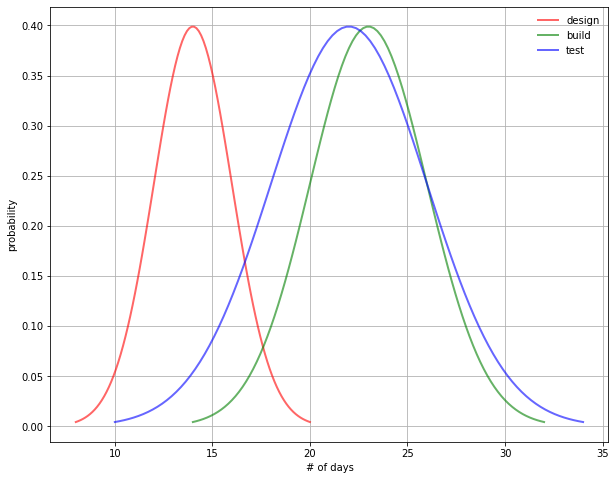

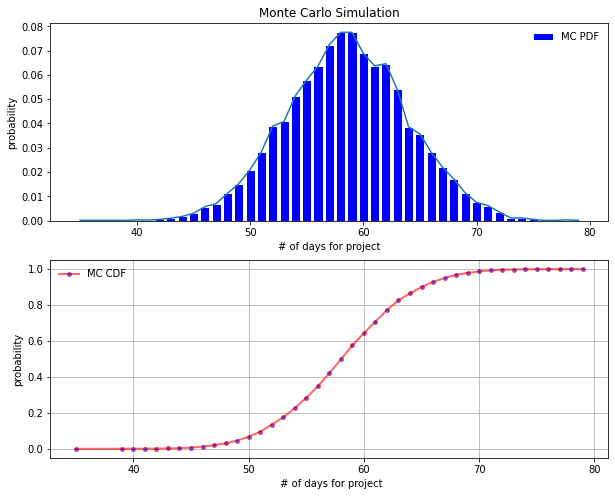

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

mu = [14, 23, 22]
sigma = [2, 3, 4]
tips = ['design', 'build', 'test']
figureIndex = 0
fig = plt.figure(figureIndex, figsize=(10,8))
color = ['r', 'g', 'b']
ax = fig.add_subplot(111)
for i in range(3):
    x = np.linspace(mu[i]-3*sigma[i], mu[i]+3*sigma[i], 100)
    y_sig = np.exp(-(x-mu[i])**2/(2*sigma[i]**2))/(math.sqrt(2*math.pi))
    ax.plot(x, y_sig, color[i]+'-', linewidth=2,alpha=0.6, label=tips[i])
ax.legend(loc='best', frameon=False)
ax.set_xlabel('# of days')
ax.set_ylabel('probability')
plt.grid(True)
size = 10000  # 蒙特卡洛采样 三个WBS要素
samples = [np.random.normal(mu[i], sigma[i], size) for i in range(3)]
data = np.zeros(len(samples[1]))  # 计算工期
for i in range(len(samples[1])):
    for j in range(3):
        data[i] += samples[j][i]
    data[i] = int(data[i])

def count(lis):  # 统计一个列表中每个元素出现的次数
    lis = np.array(lis)
    key = np.unique(lis)
    x = []
    y = []
    for k in key:
        mask = (lis == k)
        list_new = lis[mask]
        v = list_new.size
        x.append(k)
        y.append(v)
    return x, y
a, b = count(data)  # 计算工期出现概率与累计概率
pdf = [x/size for x in b]
cdf = np.zeros(len(a))
for i in range(len(a)):
    if i>0:
        cdf[i] += cdf[i-1]
    cdf[i] += b[i]
cdf = cdf/size
figureIndex += 1
fig = plt.figure(figureIndex, figsize=(10,8))
ax = fig.add_subplot(211)
ax.bar(a, height=pdf, color='blue', edgecolor='white', label='MC PDF')
ax.plot(a, pdf)
ax.legend(loc='best', frameon=False)
ax.set_xlabel('# of days for project')
ax.set_ylabel('probability')
ax.set_title('Monte Carlo Simulation')
ax = fig.add_subplot(212)
ax.plot(a, cdf, 'r-', marker='o', mfc='b', ms=4, lw=2, alpha=0.6, label='MC CDF')
ax.legend(loc='best', frameon=False)
ax.set_xlabel(' # of days for project')
ax.set_ylabel('probability')
ax.grid(True)
plt.show()

![](./img/P10_5.png)

![](./img/P10_6.png)

In [26]:
import random

def play(change):
    prize = random.randint(0, 2)
    guess = random.randint(0, 2)
    if(prize==guess):
        if(change):
            return False
        else:
            return True
    else:
        if(change):
            return True
        else:
            return False
        
def winRate(change, N):
    win = 0
    for i in range(0,N):
        if(play(change)):
            win=win+1
    print("中奖率为：")
    print(win/N)

N = 1000000
print("玩"+str(N)+"次，每一次都换门：")
winRate(True,N)
print('\n')
print("玩"+str(N)+"次，每一次都不换门：")
winRate(False,N)

玩1000000次，每一次都换门：
中奖率为：
0.666102


玩1000000次，每一次都不换门：
中奖率为：
0.333804


![](./img/P10_7.png)

In [28]:
import time
import random

for i in range(10):
    print(time.strftime("%Y-%m-%d %X", time.localtime()))
    dou = {1994: {'褐色': 30, '黄色': 20, '红色': 20, '绿色': 10, '橙色': 10, '黄褐': 10},
           1996: {'蓝色': 24, '绿色': 20, '橙色': 16, '黄色': 14, '红色': 13, '褐色': 13}}
    num = 100000
    list_1994 = ['褐色']*30*num+['黄色']*20*num+['红色']*20*num+['绿色']*10*num+['橙色']*10*num+['黄褐']*10*num
    list_1996 = ['蓝色']*24*num+['绿色']*20*num+['橙色']*16*num+['黄色']*14*num+['红色']*13*num+['褐色']*13*num
    random.shuffle(list_1994)
    random.shuffle(list_1996)
    count_all = 0
    count_key = 0
    for key in range(100*num):
        if list_1994[key]=='黄色' and list_1996[key]=='绿色':
            count_all+=1
            count_key+=1
        if list_1994[key]=='绿色' and list_1996[key]=='黄色':
            count_all+=1
    print(count_key/count_all, 20/27)  # count_key/count_all 模拟结果  20/27 概率论算出来的结果
    print(time.strftime("%Y-%m-%d %X", time.localtime()))

2022-09-21 11:18:17
0.7405097764586877 0.7407407407407407
2022-09-21 11:18:27
2022-09-21 11:18:27
0.7410339879798156 0.7407407407407407
2022-09-21 11:18:36
2022-09-21 11:18:36
0.7417881319527767 0.7407407407407407
2022-09-21 11:18:45
2022-09-21 11:18:45
0.7411568271386234 0.7407407407407407
2022-09-21 11:18:54
2022-09-21 11:18:54
0.7411728300124706 0.7407407407407407
2022-09-21 11:19:04
2022-09-21 11:19:04
0.7410788965292633 0.7407407407407407
2022-09-21 11:19:13
2022-09-21 11:19:13
0.7405128262142471 0.7407407407407407
2022-09-21 11:19:22
2022-09-21 11:19:22
0.7410580828707485 0.7407407407407407
2022-09-21 11:19:31
2022-09-21 11:19:31
0.7409175589539221 0.7407407407407407
2022-09-21 11:19:40
2022-09-21 11:19:40
0.7408209064476495 0.7407407407407407
2022-09-21 11:19:50


# Python之建模时间序列上篇

* JetRail高铁乘客预测
* GDP的ARIMA建模（下篇）
* 季节性ARIMA问题（下篇）

![](./img/P10_8.png)
![](./img/P10_9.png)

数据集：https://pan.baidu.com/s/15w5_5_o8IK6ZT3VlNSRa7Q 提取码：9be3

已下载至data文件夹：train.csv

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/train.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


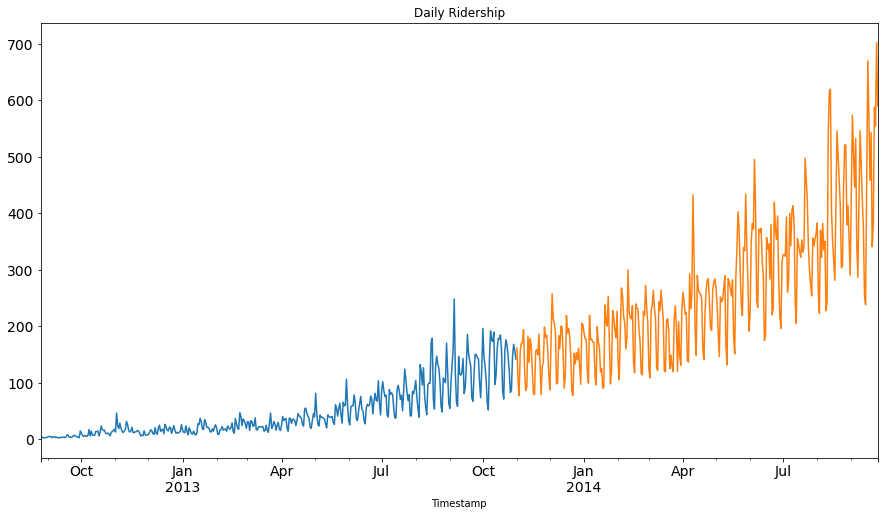

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/train.csv')
train = df[0:10392]
test = df[10392:]
df['Timestamp'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.index=df['Timestamp']
df = df.resample('D').mean()
train['Timestamp'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']
train = train.resample('D').mean()
test['Timestamp'] = pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M')
test.index = test['Timestamp']
test = test.resample('D').mean()
train.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14)
plt.show()

![](./img/P10_10.png)

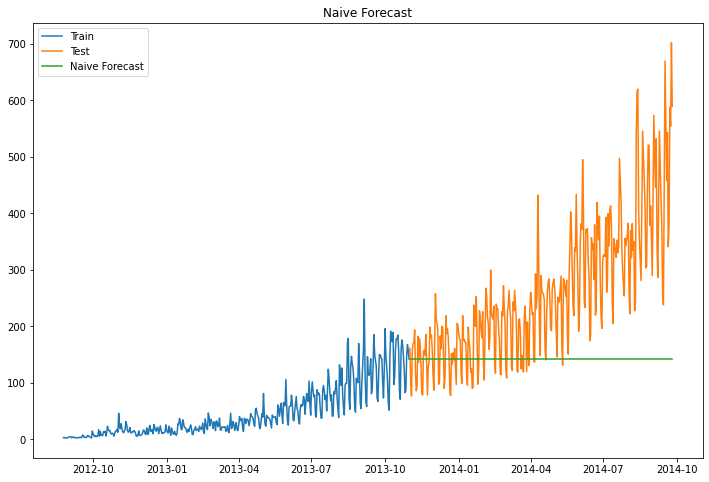

In [3]:
dd = np.asarray(train['Count'])
y_hat = test.copy()
y_hat['naive']=dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index,train['Count'],label='Train')
plt.plot(test.index,test['Count'],label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

![](./img/P10_11.png)

In [4]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test['Count'], y_hat['naive']))
print(rms)


168.10065982822383


![](./img/P10_12.png)

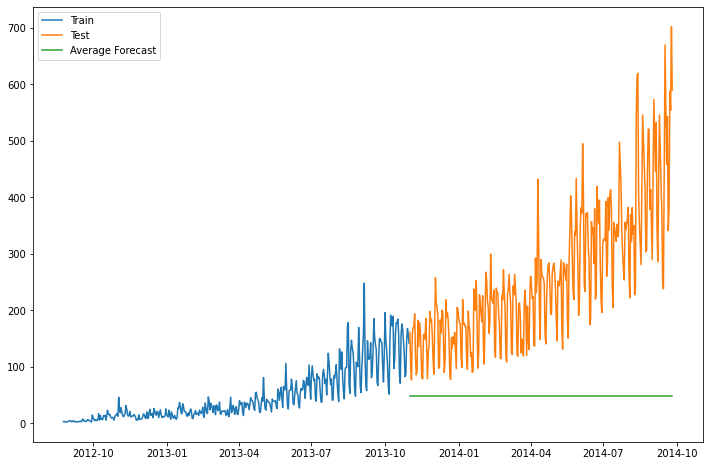

In [6]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

![](./img/P10_13.png)

In [7]:
rms = sqrt(mean_squared_error(test['Count'],y_hat_avg['avg_forecast']))
print(rms)

242.4970488095692


![](./img/P10_14.png)

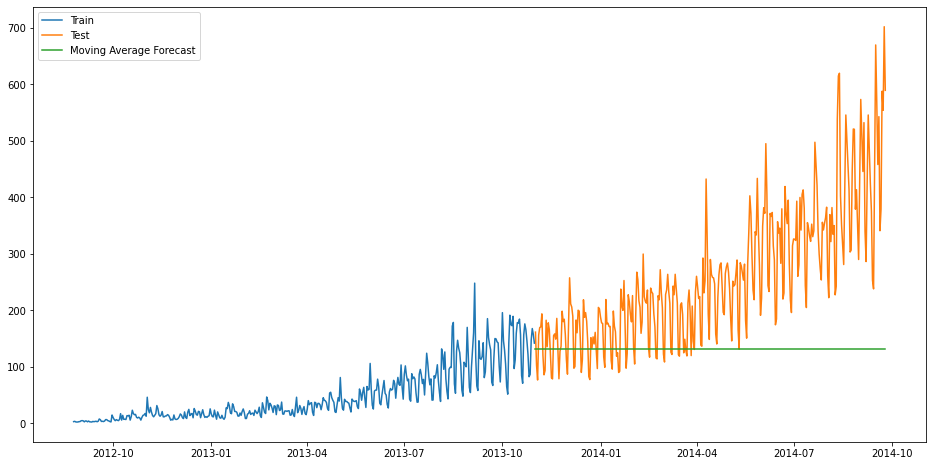

In [9]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [10]:
rms = sqrt(mean_squared_error(test['Count'],y_hat_avg['moving_avg_forecast']))
print(rms)

175.3362295623058
